In [1]:
# Importing Library
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Load the Data
The file I'll be exploring, Hmda_lar.csv, 2017 Home Mortgage Disclosure Act (HMDA) data for one state (TX) from a CSV file into a pandas dataframe. https://www.consumerfinance.gov/data-research/hmda/explore 

In [2]:
# Read the hmda_lar.csv file as a dataframe using pandas: df
df = pd.read_csv("file path/hmda_lar.csv",nrows=100) 

In [3]:
# Using pandas to view the "head" of the file with the first 10 rows
df.head(10)

,tract_to_msamd_income,rate_spread,population,minority_population,number_of_owner_occupied_units,number_of_1_to_4_family_units,loan_amount_000s,hud_median_family_income,applicant_income_000s,state_name,...,applicant_sex_name,applicant_race_name_5,applicant_race_name_4,applicant_race_name_3,applicant_race_name_2,applicant_race_name_1,applicant_ethnicity_name,agency_name,agency_abbr,action_taken_name
0,129.330002,NaN,38137,77.769997,9771,11372,240,72500,119.0,Texas,...,Female,NaN,NaN,NaN,NaN,Asian,Not Hispanic or Latino,Consumer Financial Protection Bureau,CFPB,Loan originated
1,49.389999,NaN,3107,43.930000,473,914,277,73400,NaN,Texas,...,Not applicable,NaN,NaN,NaN,NaN,Not applicable,Not applicable,Office of the Comptroller of the Currency,OCC,Loan originated
2,88.320000,NaN,2503,73.269997,433,736,399,73400,151.0,Texas,...,Male,NaN,NaN,NaN,NaN,White,Not Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated
3,129.360001,NaN,14070,45.130001,3794,4768,246,73400,122.0,Texas,...,"Information not provided by applicant in mail,...",NaN,NaN,NaN,NaN,"Information not provided by applicant in mail,...","Information not provided by applicant in mail,...",Department of Housing and Urban Development,HUD,Loan originated
4,121.830002,NaN,12464,85.260002,2221,3441,107,45300,51.0,Texas,...,Female,NaN,NaN,NaN,NaN,White,Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated
5,87.879997,NaN,8166,82.980003,1483,1932,105,72500,105.0,Texas,...,Male,NaN,NaN,NaN,NaN,"Information not provided by applicant in mail,...",Hispanic or Latino,Consumer Financial Protection Bureau,CFPB,Loan originated
6,129.330002,NaN,38137,77.769997,9771,11372,242,72500,84.0,Texas,...,Male,NaN,NaN,NaN,NaN,Black or African American,Not Hispanic or Latino,Consumer Financial Protection Bureau,CFPB,Loan originated
7,49.389999,NaN,3107,43.930000,473,914,232,73400,103.0,Texas,...,Male,NaN,NaN,NaN,White,American Indian or Alaska Native,Not Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated
8,168.710007,NaN,3599,9.500000,1273,1371,150,73400,165.0,Texas,...,Male,NaN,NaN,NaN,NaN,Asian,Not Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated
9,109.099998,NaN,5148,71.620003,1213,1494,117,73400,61.0,Texas,...,"Information not provided by applicant in mail,...",NaN,NaN,NaN,NaN,"Information not provided by applicant in mail,...","Information not provided by applicant in mail,...",Department of Housing and Urban Development,HUD,Loan originated


In [4]:
### Using pandas to run summary statistics on the data
df.describe(include="all")

,tract_to_msamd_income,rate_spread,population,minority_population,number_of_owner_occupied_units,number_of_1_to_4_family_units,loan_amount_000s,hud_median_family_income,applicant_income_000s,state_name,...,applicant_sex_name,applicant_race_name_5,applicant_race_name_4,applicant_race_name_3,applicant_race_name_2,applicant_race_name_1,applicant_ethnicity_name,agency_name,agency_abbr,action_taken_name
count,100.000000,13.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,93.000000,100,...,100,0.0,0.0,0.0,2,100,100,100,100,100
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,4,NaN,NaN,NaN,1,7,4,6,6,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Texas,...,Male,NaN,NaN,NaN,White,White,Not Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100,...,51,NaN,NaN,NaN,2,44,43,68,68,100
mean,109.810700,2.241538,12860.190000,60.723200,3044.360000,3851.360000,190.230000,67974.00000,93.892473,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,37.497500,1.052844,12616.028478,23.210220,3323.807387,3722.533303,109.340803,10483.96197,56.381747,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,49.389999,1.500000,2503.000000,3.050000,433.000000,736.000000,3.000000,40300.00000,4.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,85.234997,1.560000,4707.000000,43.930000,1191.000000,1402.500000,113.500000,72475.00000,50.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,118.899998,1.780000,7904.000000,65.900002,1596.000000,2301.000000,180.000000,72950.00000,91.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,129.330002,2.390000,12464.000000,77.769997,2472.500000,3515.250000,243.750000,73400.00000,122.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# read the large csv file with specified chunksize 
df_chunk = pd.read_csv("file path/hmda_lar.csv", chunksize=100) 

In [6]:
subset_df = df[['loan_amount_000s','applicant_income_000s']]

In [7]:
subset_df = subset_df.dropna()

In [8]:
# summary statistics
subset_df.describe() 

,loan_amount_000s,applicant_income_000s
count,93.000000,93.000000
mean,187.806452,93.892473
std,112.216818,56.381747
min,3.000000,4.000000
25%,110.000000,50.000000
50%,176.000000,91.000000
75%,243.000000,122.000000
max,549.000000,310.000000


In [9]:
# return unique values in the column

df['applicant_income_000s'].unique() 

array([119.,  nan, 151., 122.,  51., 105.,  84., 103., 165.,  61.,  94.,
       110.,  43., 106.,  92.,  49., 178.,  58., 160., 101.,  54.,  29.,
       182.,  23., 134.,  82., 112.,  89.,  99.,  47., 133.,  22.,  44.,
        68., 131.,  65.,  79.,  59.,  40., 104., 143., 240., 159.,  50.,
        95.,  27., 118., 127., 100.,  78., 135.,  96.,  70.,  56., 148.,
        69., 282.,  64.,  91.,  39., 310.,  73.,  31.,  32., 221., 129.,
       132.,  60., 203.,   4.,  42., 113.])

In [10]:
# what are the dtypes of the columns
df.dtypes

tract_to_msamd_income             float64
rate_spread                       float64
population                          int64
minority_population               float64
number_of_owner_occupied_units      int64
number_of_1_to_4_family_units       int64
loan_amount_000s                    int64
hud_median_family_income            int64
applicant_income_000s             float64
state_name                         object
state_abbr                         object
sequence_number                   float64
respondent_id                      object
purchaser_type_name                object
property_type_name                 object
preapproval_name                   object
owner_occupancy_name               object
msamd_name                         object
loan_type_name                     object
loan_purpose_name                  object
lien_status_name                   object
hoepa_status_name                  object
edit_status_name                  float64
denial_reason_name_3              

In [11]:
# check for null values
df.isnull().sum()

tract_to_msamd_income               0
rate_spread                        87
population                          0
minority_population                 0
number_of_owner_occupied_units      0
number_of_1_to_4_family_units       0
loan_amount_000s                    0
hud_median_family_income            0
applicant_income_000s               7
state_name                          0
state_abbr                          0
sequence_number                   100
respondent_id                       0
purchaser_type_name                 0
property_type_name                  0
preapproval_name                    0
owner_occupancy_name                0
msamd_name                          0
loan_type_name                      0
loan_purpose_name                   0
lien_status_name                    0
hoepa_status_name                   0
edit_status_name                  100
denial_reason_name_3              100
denial_reason_name_2              100
denial_reason_name_1              100
county_name 

In [12]:
# droping applicant_race_name_5 
df.drop('applicant_race_name_5', axis= 1, inplace=True)

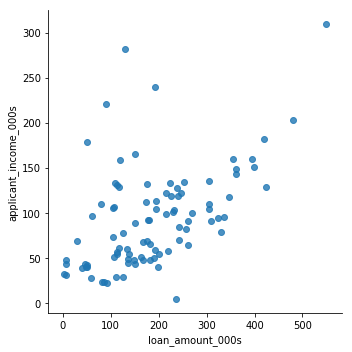

In [14]:
g = sns.lmplot('loan_amount_000s', 'applicant_income_000s', data=subset_df, fit_reg=False)
plt.show()